# Text Preprocessing

### 1. 토큰화

##### 1-1. 단어 토큰화

- 띄어쓰기 단위로 자르면 사실상 단어 토큰이 구분되는 영어와 달리

- 한국어는 띄어쓰기 만으로는 단어 토큰을 구분하기 어려움

##### 1-2. 토큰화 중 생기는 선택의 순간

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\magic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
print('단어 토큰화1: ', word_tokenize("Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1:  ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [3]:
print('단어 토큰화2: ', WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2:  ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [4]:
print('단어 토큰화3: ', text_to_word_sequence("Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화3:  ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


- 각 토크나이저가 다른 결과를 반환하는 것을 확인

- 목적에 맞는 토크나이저 정의 및 활용이 필요함

##### 1-3. 토큰화에서 고려해야할 사항

- 구두점이나 특수 문자를 단순 제외해서는 안 된다

    - 코퍼스에 대한 정제 작업을 진행하다보면, 구두점조차도 하나의 토큰으로 분류하기도 함

    - 가장 기본적인 예로, 마침표와 같은 경우는 문자의 경계를 알 수 있으므로 제외하지 않음

    - 또 다른 예로 단어 자체에 구두점을 갖고 있는 경우 m.p.h, Ph.D, AT&T

    - 특수 문자나 슬래시를 사용하는 $45.55, 날짜 구분, 숫자 사이의 컴마

- 줄임말과 단어 내에 띄어쓰기가 있는 경우

    - (')의 경우 영어권 언어의 압축된 단어를 다시 펼치는 역할

    - what're는 what are의 줄임말이며, re를 접어라고 함

    - New York이나 rock 'n' roll도 하나의 단어로 사용하지만 띄어쓰기가 존재

    - 결국 토큰화 작업은 저런 단어를 하나로 인식할 수 있는 능력도 가져야 함



In [5]:
# 토큰화 방법 중 하나인 Penn Treebank Tokenization의 규칙
# 규칙 1. 하이푼으로 구성된 단어는 하나로 유지
# 규칙 2. doesn't와 같이 접어가 함께하는 단어는 분리해준다

from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own"

print('TreebankWordTokenizer: ', tokenizer.tokenize(text)) 

TreebankWordTokenizer:  ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own']


##### 1-4. 문장 토큰화

- 코퍼스 내에서 문장 단위 분류

- 직관적으로 (?), (.), (!) 등을 기준으로 문장으로 잘라내기

- (!)나 (?)는 꽤 명확한 구분자 역할을 하지만 마침표는 그렇지 않음

- ex1) IP 192.168.56.31 서버에 들어가서 ...

- ex2) Since i'm actively looking for Ph.D. students, i get the same question a dozen times every year.

- 사용하는 코퍼스가 어떤 국적의 언어인지, 또는 해당 코퍼스 내에서 특수문자들이 어떻게 사용되고 있는지에 따라서 직접 규칙들을 정의

- 100%의 정확도를 얻는 일은 쉬운 일이 아닌데, 갖고있는 코퍼스 데이터에 오타나, 문장의 구성이 엉망이라면 정해놓은 규칙이 소용없을 수도 있음


In [6]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1: ', sent_tokenize(text))

문장 토큰화1:  ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [7]:
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2:', sent_tokenize(text))

문장 토큰화2: ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [8]:
# import kss

# text = "딥 러닝 자연어 처리가 재미있는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?"
# print('한국어 문장 토큰화: ', kss.split_sentences(text))

##### 1-5. 한국어에서의 토큰화의 어려움

- 영어는 New York과 같은 합성어나 he's와 같이 줄임말에 대한 예외처리만 한다면

- 띄어쓰기를 기준으로 하는 토큰화를 수행해도 단어 토큰화가 잘 작동

- 거의 대부분의 경우에서 단어 단위로 띄어쓰기가 이루어지기 때문

- 하지만 한국어는 영어와 달리 띄어쓰기만으로 토큰화를 하기에 부족

- 한국어의 경우 띄어쓰기 단위가 되는 단위를 '어절'이라고 하는데

- 어절 토큰화는 한국어 NLP에서 지양

- 어절 토큰화는 단어 토큰화와 같지 않기 때문

- 한국어의 조사, 어미 등을 붙여서 말을 만드는 교착어라는 특징에서 기인

- 교착어의 특성

    - 한국어에는 조사라는 것이 존재

    - '그'라는 하나의 단어에도 조사에 따라 그가, 그는, 그에게, 그를과 같이 다양한 단어 생성

    - 대부분의 한국어 NLP에서 조사는 분리해줄 필요가 있음

    - 한국어 토큰화에서는 **형태소(morpheme)** 이라는 개념을 반드시 이해해야함

    - 형태소란 뜻을 가진 가장 작은 말의 단위

    - 자립 형태소와 의존 형태소

        - 자립 형태소: 체언(명사, 대명사, 수사), 수식언(관형사, 부사), 감탄사 등

        - 의존 형태소: 다른 형태소와 결합하여 사용되는 형태소. 접사, 어미, 조사, 어간

    - 문장: 에디가 책을 읽었다

    - 띄어쓰기 단위 ['에디가', '책을', '읽었다']

    - 자립 형태소 ['에디', '책']

    - 의존 형태소 ['-가', '-을', '읽-', '-었-', '-다']

- 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.

    - 사용하는 한국어 코퍼스가 뉴스 기사와 같이 띄어쓰기를 철저하게 지키려고 노력한다면 좋겠지만

    - 지켜지지 않는 코퍼스가 많음

##### 1-6. 품사 태깅

- 단어는 표기는 같지만 품사에 따라서 단어의 의미가 달라지기도 함

- 영어 단어 fly는 동사로는 '날다'라는 의미를 갖지만 명사로는 '파리'

- 한국어도 마찬가지로 단어가 여러 품사를 가지면서 의미가 달라짐

##### 1-7. NLTK와 KoNLPy를 이용한 영어, 한국어 토큰화 실습

- NLTK에서는 Penn Treebank POS Tags라는 기준을 사용하여 품사를 태깅

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print('단어 토큰화:', tokenized_sentence)
print('품사 태깅: ', pos_tag(tokenized_sentence))

단어 토큰화: ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅:  [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\magic\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


- Penn Treebank Pos Tags에서는

- PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미

- 한국어 자연어 처리르 위해서는 KoNLPy라는 파이썬 패키지를 사용할 수 있음

- 패키지를 통해 사용할 수 있는 형태소 분석기로 Okt, Mecab, Komoran, Hannanum, Kkma가 있음

- konlpy JVM error

In [15]:
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('Okt 형태소 분석: ', okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('Okt 품사 태깅: ', okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('Okt 명사 추출: ', okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

Okt 형태소 분석:  ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
Okt 품사 태깅:  [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
Okt 명사 추출:  ['코딩', '당신', '연휴', '여행']


In [ ]:
print('꼬꼬마 형태소 분석: ', kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅: ', kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("꼬꼬마 명사 추출: ", kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

꼬꼬마 형태소 분석:  ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅:  [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출:  ['코딩', '당신', '연휴', '여행']


- 형태소 분석기도 성능과 결과가 다르게 나옴

- 형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 됨

- 예를 들어 속도를 중시한다면 Mecab을 사용할 수 있음

### 2. 정제(Cleaning) & 정규화(Normalization)

- 토큰화 작업 전, 후에는 텍스트 데이터를 용도에 맞게 정제 및 정규화 해야함

    - 정제: 갖고 있는 코퍼스로부터 노이즈 데이터를 제거한다
    
    - 정규화: 표현 방법이 다른 단어들을 통합시켜서 같은 단어로 만들어준다

##### 2-1. 규칙에 기반한 표기가 다른 단어들의 통합

- USA와 US는 같은 의미를 가지므로 하나의 단어로 정규화

- uh-huh와 uhhuh는 형태는 다르지만 여전히 같은 의미

- 표기가 다른 단어들을 통합하는 방법인 어간 추출(stemming)과 표제어 추출(lemmatization)

##### 2-2. 대, 소문자 통합

- 영어권 언어에서 대문자는 문장의 맨 앞 등과 같은 특정 상황에서만 쓰이고, 대부분의 글은 소문자로 작성

- 대문자를 소문자로 변환하는 작업 필요

- 하지만 무작정 통합은 안 됨

- 미국을 뜻하는 단어 US와 우리를 뜻하는 단어 us는 구분되어야 함

- 회사 이름이나 사람 이름 등은 대문자로 유지되는 것이 옳음

- 여러 고려 사항이 존재하므로 결국 예외 사항을 크게 고려하지 않고

- 모든 코퍼스를 소문자로 바꾸는 것이 종종 더 실용적인 해결책이 되기도 함

##### 2-3. 불필요한 단어의 제거

- 노이즈 데이터는 자연어가 아니면서 아무 의미도 갖지 않는 글자들을 의미하기도 하지만

- 분석하고자 하는 목적에 맞지 않는 불필요 단어들을 노이즈 데이터라고 하기도 함

- 불필요한 단어들을 제거하는 방법으로는

- 불용어 제거, 등장 빈도가 적은 단어, 길이가 짧은 단어들을 제거

- 등장 빈도가 적은 단어

    - 스팸 메일 분류기를 만든다고 가정

    - 스팸 메일과 정상 메일에서 주로 등장하는 단어로 구분하는 것을 설계

    - 100,000개의 메일 데이터에서 총 합 5번밖에 등장하지 않은 단어가 있다면

    - 이 단어는 직관적으로 분류에 거의 도움이 되지 않을 것임을 알 수 있음

- 길이가 짧은 단어

    - 영어권 언어에서는 길이가 짧은 단어를 삭제하는 것만으로도 어느 정도 효과가 있다고 알려져 있음

    - 길이가 짧은 단어를 제거하는 2차 이유는 단어가 아닌 구두점들까지도 한꺼번에 제거하기 위함

    - 하지만 한국어는 길이가 짧은 단어라고 삭제하는 방법이 크게 유효하지 않을 수 있음

    - 단정적으로 말할 수 없지만 영어 단어의 평균 길이는 6~7 정도, 한국어는 2~3 정도

In [ ]:
import re

text = "I was wondering if anyone out there could enligten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')  # \W*: 비 단어 문자(구두점 등) 개수 상관X
                                           # \b: 단어 경계 분할
                                           # \w{1,2}: 길이가 1, 2인 단어
print(shortword.sub('', text))

 was wondering anyone out there could enligten this car.


##### 2-4. 정규 표현식

- 코퍼스에서 노이즈 데이터의 특징을 잡아낼 수 있다면

- 정규 표현식을 통해 이를 제거

- HTML 문서라면 HTML 태그, 뉴스 기사하면 게재 시간 등

### 3. 어간 추출(Stemming) & 표제어 추출(Lemmatization)

- 이 두 작업은 눈으로 봤을 때는 서로 다른 단어들이지만

- 하나의 단어로 일반화시킬 수 있다면 하나의 단어로 일반화시켜서 문서 내의 단어를 줄이겠다는 것

- 이러한 방법들은 단어의 빈도 수를 기반으로 문제를 풀고자 하는 BoW(Bag of Words) 표현을 사용하는 자연어 처리 문제에서 주로 사용

- 자연어 처리에서 전처리, 더 정확히는 정규화의 지향점은 언제나 갖고 있는 코퍼스로부터 복잡성을 줄이는 일

##### 3-1. 표제어 추출

- '표제어' 또는 '기본 사전형 단어'정도의 의미

- am, are, is는 다른 형태를 가지지만 뿌리 단어는 be라고 볼 수 있음

- 이때, 이 단어들의 표제어는 be라고 함

- 표제어 추출을 하는 가장 섬세한 방법은 단어의 형태학적 파싱을 먼저 진행하는 것

- 형태소란 '의미를 가진 가장 작은 단위'

- 형태소의 종류로 어간(stem)과 접사(affix)가 존재

    - 어간: 단어의 의미를 감고 있는 단어의 핵심 부분

    - 접사: 단어에 추가적인 의미를 주는 부분

- cats라는 단어에 대해 cat(어간) -s(접사)로 분리

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전:', words)
print('표제어 추출 후:', [lemmatizer.lemmatize(word) for word in words])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hyojuuun/nltk_data...


표제어 추출 전: ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후: ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


- 표제어 추출은 단어의 형태가 적절히 보존되는 양상을 보이는 특징이 있음

- 하지만 그럼에도 dy, ha와 같이 의미를 알 수 없는 적절하지 못한 단어를 출력함

- 이는 표제어 추출기(lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과가 얻을 수 있기 때문

In [ ]:
lemmatizer.lemmatize('dies', 'v')

'die'

In [ ]:
lemmatizer.lemmatize('watched', 'v')

'watch'

In [ ]:
lemmatizer.lemmatize('has', 'v')

'have'

- 표제어 추출은 문맥을 고려하여 수행했을 때 해당 단어의 품사 정보를 보존

- 하지만 어간 추출은 수행한 결과의 품사 정보가 보존되지 않음

- 더 정확히는 어간 추출을 한 결과는 사전에 존재하지 않는 단어일 경우가 많음

##### 3-2. 어간 추출

- 어간 추출은 형태학적 분석을 단순화한 버전이라고 볼 수도 있고

- 정해진 규칙만 보고 단어의 어미를 자르는 어람짐작의 작업이라고 볼 수도 있음

- 이 작업은 섬세한 작업이 아니기 때문에 어간 추출 후에 나오는 겨로가 단어는 사전에 존재하지 않는 단어일 수 있음

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print("어간 추출 전:", tokenized_sentence)
print("어간 추출 후:", [stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전: ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후: ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


- 규칙 기반의 접근을 하고 있으므로 어간 추출 후의 결과에는 사전에 없는 단어들도 포함되어 있음

- 가령, 포터 알고리즘의 어간 추출은 이러한 규칙들을 가짐

    - alize -> al

    - ance -> 제거

    - ical -> ic

- 위의 규칙에 따르면 

    - formalize -> formal

    - allowance -> allow
    
    - electricical -> electric

In [ ]:
words = ['formalize', 'allowance', 'electricical']

print('어간 추출 전:', words)
print('어간 추출 후:', [stemmer.stem(word) for word in words])

어간 추출 전: ['formalize', 'allowance', 'electricical']
어간 추출 후: ['formal', 'allow', 'electric']


- porter 알고리즘의 상세 규칙은 마틴 포터의 홈페이지에서 확인 가능

- 어간 추출 속도는 표제어 추출보다 일반적으로 빠른데

- 포터 어간 추출기는 정밀하게 설계되어 정확도가 높으므로 영어 자연어 처리에서 어간 추출을 하고자 한다면 가장 준수한 선택

- NLTK에서는 포터 알고리즘 외에도 랭커스터 스태머(Lancaster Stemmer)알고리즘을 지원

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('어간 추출 전:', words)
print('포터 스태머의 어간 추출 후:', [porter_stemmer.stem(word) for word in words])
print('랭커스터 스태머의 어간 추출 후:', [lancaster_stemmer.stem(word) for word in words])

어간 추출 전: ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


- 동일한 단어들의 나열에 대해서 두 스태머는 전혀 다른 결과를 보여줌

- 서로 다른 알고리즘을 사용하기 때문인데 이미 알려진 알고리즘을 사용할 때는

- 사용하고자 하는 코퍼스에 스태머를 적용해보고 어떤 스태머가 해당 코퍼스에 적합한지를 판단한 후에 사용해야 함

- 이런 규칙에 기반한 알고리즘은 종종 제대로 된 일반화를 수행하지 못 할 수 있음

- organization -> organ

- 완전히 다른 단어 임에도 어간 추출의 결과가 되는 것을 확인할 수 있음

- 표제어 추출과 어간 추출의 결과 차이

    - Stemming

        - am -> am
        
        - the going -> the go

        - having -> hav

    - Lemmatization

        - am -> be

        - the going -> the going

        - having -> have

##### 3-3. 한국어에서의 어간 추출

- 한국어는 5언 9품사의 구조를 가지고 있음

- 이 중 용언에 해당하는 '동사'와 '형용사'는 어간과 어미(ending)의 결합으로 구성

- 활용(Conjugation)

    - 활용이란 용언의 어간이 어미를 가지는 일을 말함
    
    - 어간: 용언을 활용할 때, 원칙적으로 모양이 변하지 않는 부분
    
    - 어미: 용언의 어간 뒤에 붙어 활용하면서 변하는 부분, 여러 문법적 기능을 수행
    
    - 규칙 활용과 불규칙 활용
    
- 규칙 활용

    - 규칙 활용은 어간이 어미를 취할 때, 어간의 모습이 일정함

    - 잡다, 잡고, 잡으니, 잡아서

- 불규칙 활용

    - 불규칙 활용은 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우

    - 예를 들어 '듣-, 돕-, 곱-, 잇-, 오르-, 노랗-' 등이

    - [듣고, 들으니], [돕다, 도와], [곱다, 고와], [잇다, 이어서], [오르니, 올라], [노랗다, 노라니]

    - 오르+아/어 -> 올라, 하+아/어 -> 하여와 같이 일반적인 어미가 아닌 특수한 어미를 취하는 경우 불규칙활용을 하는 예에 속함

### 4. 불용어(StopWord)

- 갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요

- 여기서 큰 의미가 없다라는 것은 자주 등장하지만 분석을 하는 것에 있어서 큰 도움이 되지 않는 단어들을 말함

- 예를 들어 I, my, me, over, 조사, 접미사 같은 단어들은 문장에서 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없는 경우가 있음

- NLTK에서 100여개 이상의 영어 단어들을 불용어로 패키지 내에서 미리 정의함

- 물론 불용어는 개발자가 직접 정의할 수도 있음

##### 4-1. NLTK에서 불용어 확인하기

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hyojuuun/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words_list = stopwords.words('english')
print('불용어 개수: ', len(stop_words_list))
print('불용어 10개 출력: ', stop_words_list[:10])

불용어 개수:  179
불용어 10개 출력:  ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


##### 4-2. NLTK를 통해서 불용어 제거하기

In [ ]:
example = "Family is not an important thing. It's everything"
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)

result = []
for word in word_tokens:
    if word not in stop_words:
        result.append(word)

print('불용어 제거 전: ', word_tokens)
print('불용어 제거 후: ', result)

불용어 제거 전:  ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything']
불용어 제거 후:  ['Family', 'important', 'thing', '.', 'It', "'s", 'everything']


##### 4-3. 한국어에서 불용어 제거하기

- 한국어에서 불용어를 제거하는 방법으로는 간단하게는 토큰화 후에 조사, 접속사 등을 제거하는 방법

- 하지만 불용어를 제거하려고 하다보면 조사나, 접속사와 같은 단어들뿐만 아니라 명사, 형용사와 같은 단어들 중에서 제거하고 싶은 단어들이 생기기도 함

- 결국 사용자가 직접 불용어 사전을 만들어야 함

In [ ]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지"
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"  # 임의 불용어 사전 정의

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if word not in stop_words]
print('불용어 제거 전:', word_tokens)
print('불용어 제거 후:', result)

불용어 제거 전: ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지']
불용어 제거 후: ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지']


[보편적으로 선택할 수 있는 한국어 불용어 리스트](https://www.ranks.nl/stopwords/korean)

### 5. 정규 표현식(Regular Expression)

- 파이썬에서 지원하고 있는 정규 표현식 모듈 re의 사용

##### 5-1. 정규 표현식 문법과 모듈 함수

- 정규 표현식 문법

![스크린샷 2024-02-23 오후 7.07.41.png](<attachment:스크린샷 2024-02-23 오후 7.07.41.png>)

![스크린샷 2024-02-23 오후 7.11.57.png](<attachment:스크린샷 2024-02-23 오후 7.11.57.png>)

- 정규 표현식 모듈 함수

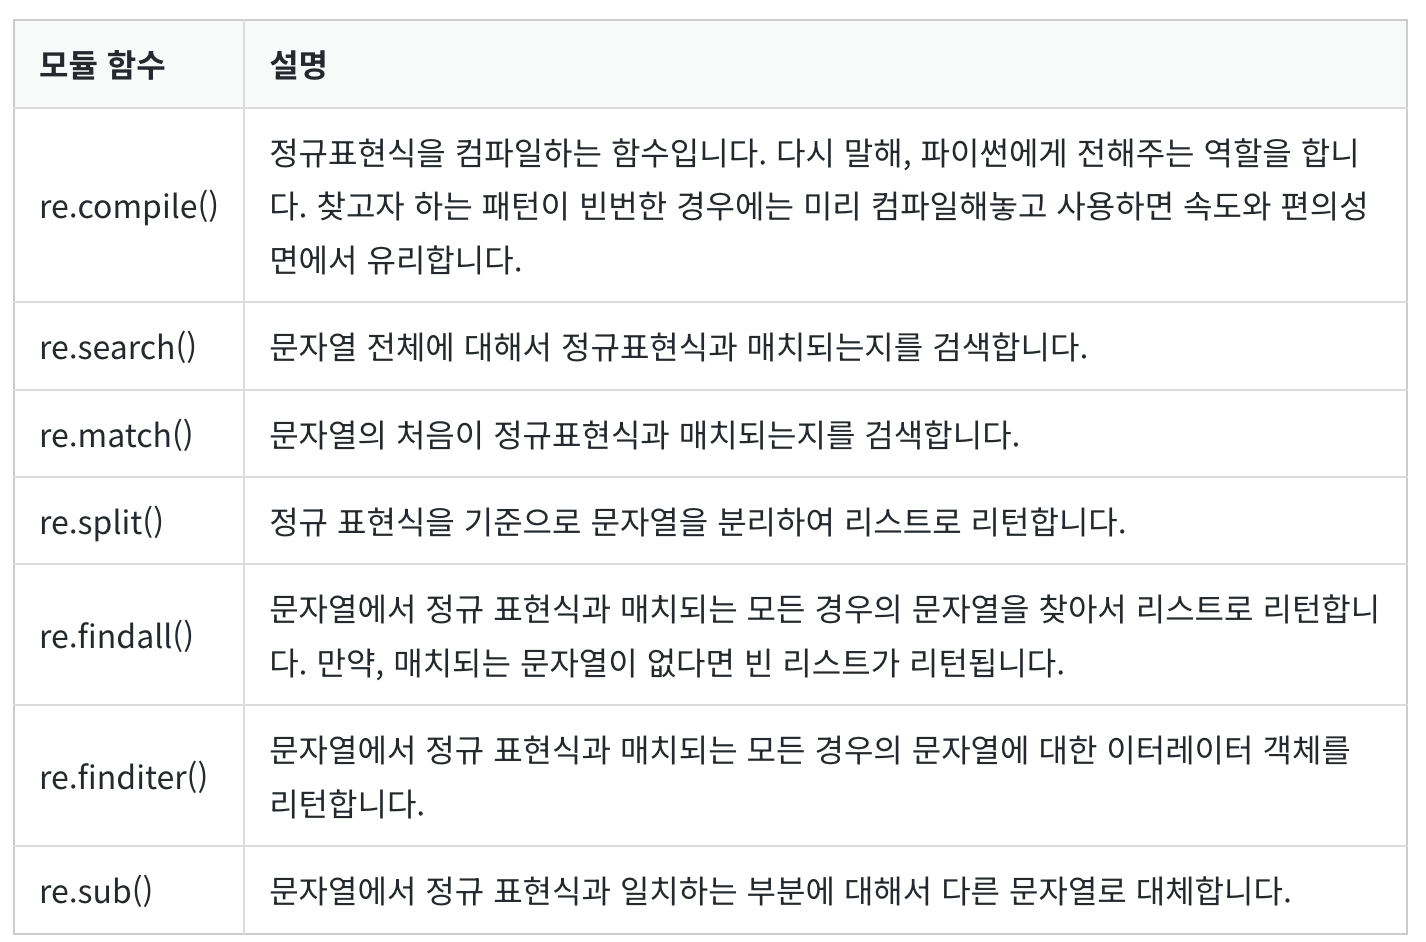
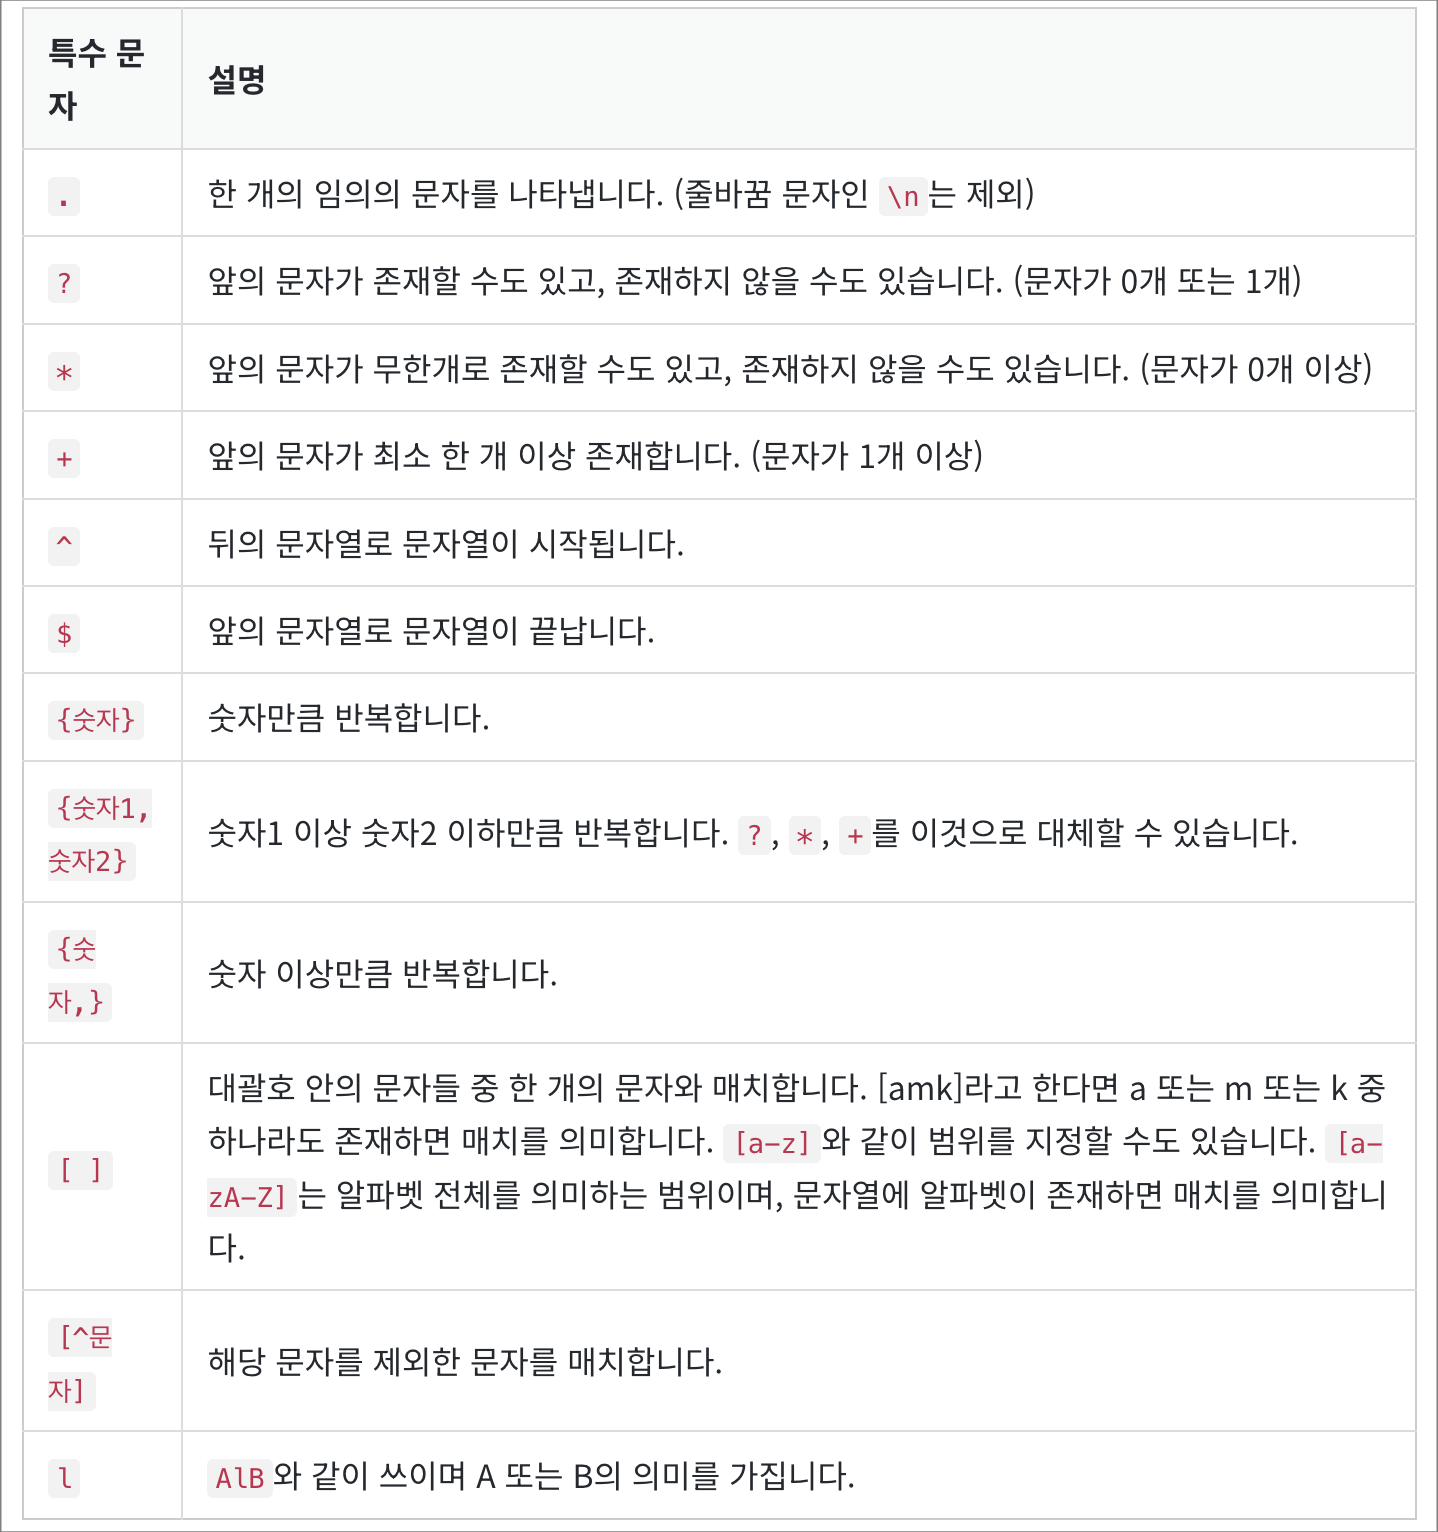
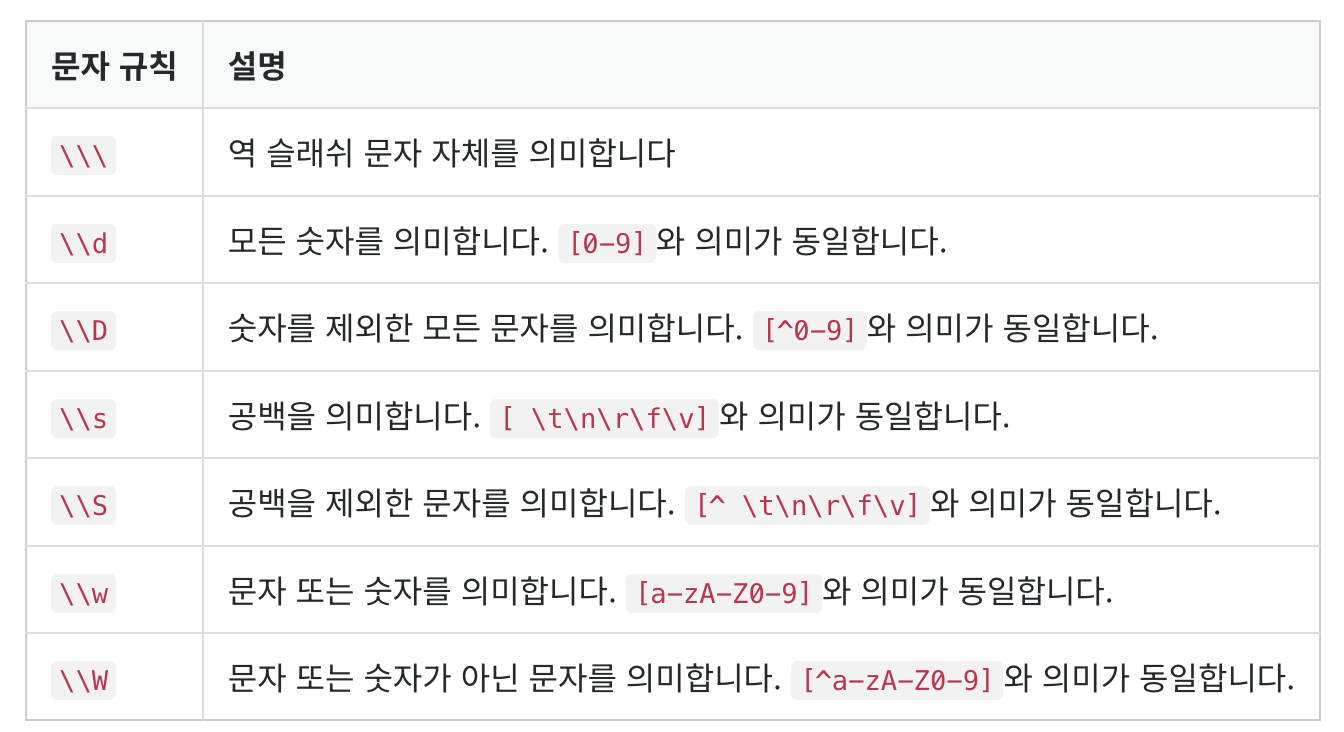

- re.compile()에 정규 표현식을 컴파일하고 나머지 함수를 사용하여 이해

##### 5-2. 정규 표현식 실습

- " . " 기호

- 한 개의 임의의 문자

In [ ]:
import re

r = re.compile("a.c")

r.search("kkk")

In [ ]:
print(r.search("abc"))
print(r.search("a@c"))

<re.Match object; span=(0, 3), match='abc'>
<re.Match object; span=(0, 3), match='a@c'>


- " ? " 기호

- 앞의 문자가 존재할 수도 있고 존재하지 않을 수도 있는 경우

- ab?c: b는 있다고 취급할 수도, 없다고 취급할 수도 있음

In [ ]:
r = re.compile("ab?c")

r.search('abbc')

In [ ]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search('ac')

<re.Match object; span=(0, 2), match='ac'>

- " * " 기호

- 바로 앞의 문자가 0개 이상

In [ ]:
r = re.compile('ab*c')

r.search('a')

In [ ]:
r.search('ac')

<re.Match object; span=(0, 2), match='ac'>

In [ ]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search('abbbc')

<re.Match object; span=(0, 5), match='abbbc'>

- " + " 기호

- " * "과 유사하나 앞의 문자가 최소 1개 이상

In [ ]:
r = re.compile('ab+c')

r.search('ac')

In [ ]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search('abbbbc')

<re.Match object; span=(0, 6), match='abbbbc'>

- " ^ " 기호

- 시작되는 문자열 지정

In [ ]:
r = re.compile('^ab')

r.search('bbc')

In [ ]:
r.search('abz')

<re.Match object; span=(0, 2), match='ab'>

- {숫자} 기호

- 문자에 해당 기호를 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타냄

In [ ]:
r = re.compile('ab{2}c')

r.search('ac')

In [ ]:
r.search('abbc')

<re.Match object; span=(0, 4), match='abbc'>

- {숫자1, 숫자2} 기호

- 문자에 해당 기호를 붙이면 숫자1 이상 숫자2 이하만큼 반복

In [ ]:
r = re.compile('ab{2,8}c')  # ab{2, 8}c 와는 다른 결과가 나오므로 주의

r.search('ac')

In [ ]:
r.search('abbc')

<re.Match object; span=(0, 4), match='abbc'>

In [ ]:
r.search('abbbbbbbc')

<re.Match object; span=(0, 9), match='abbbbbbbc'>

- {숫자,} 기호

- 해당 문자를 숫자 이상만큼 반복

In [ ]:
r = re.compile('a{2,}bc')

r.search('bc')

In [ ]:
r.search('aaaaaaaabc')

<re.Match object; span=(0, 10), match='aaaaaaaabc'>

- []기호

- [] 안에 문자들을 넣으면 그 문자들 중 한 개의 문자와 매치

- [abc]: a또는 b또는 c

- [a-zA-Z]: 알파벳 전체

In [ ]:
r = re.compile('[abc]')

r.search('g')

In [ ]:
r.search('aaaaaa')

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search('baac')

<re.Match object; span=(0, 1), match='b'>

- [^문자] 기호

- ^ 뒤에 붙은 문자들을 제외한 모든 문자를 매치

- [^abc]: a또는 b또는 c가 들어간 문자열을 제외한 모든 문자열

In [ ]:
r = re.compile('[^abc]')

r.search('a')

In [ ]:
r.search('dtgf')

<re.Match object; span=(0, 1), match='d'>

##### 5-3. 정규 표현식 모듈 함수 예제

- re.match(), re.search()의 차이

- match함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 않음 

In [ ]:
r = re.compile('ab.')

r.match('kkkabc')

In [ ]:
r.search('kkkabc')

<re.Match object; span=(3, 6), match='abc'>

In [ ]:
r.match('abckkk')

<re.Match object; span=(0, 3), match='abc'>

- re.split()

In [ ]:
text = '사과 딸기 수박 메론 바나나'

re.split(' ', text)

['사과', '딸기', '수박', '메론', '바나나']

In [ ]:
text = """사과 
딸기
수박
메론
바나나"""

re.split('\n', text)

['사과 ', '딸기', '수박', '메론', '바나나']

- re.findall()

- 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴

- 단, 매치되는 문자열이 없다면 빈 리스트를 리턴

In [ ]:
text = """이름: 김철수
전화번호: 010 - 1234 - 5678
나이: 30
성별: 남"""

re.findall('\d+', text)

['010', '1234', '5678', '30']

In [ ]:
re.findall('\d', text)  # +가 없는 경우

['0', '1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '3', '0']

In [ ]:
re.findall('\d', '문자열입니다')

[]

- re.sub()

- 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체

In [ ]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


##### 5-4. 정규 표현식 텍스트 전처리 예제

In [ ]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

re.split('\s+', text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [ ]:
re.findall('\d+', text)

['100', '101', '102']

In [ ]:
re.findall('[A-Z]', text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [ ]:
re.findall('[A-Z]{4}', text)

['PROF', 'STUD', 'STUD']

In [ ]:
re.findall('[A-Z]+', text)

['J', 'PROF', 'J', 'STUD', 'M', 'STUD']

In [ ]:
re.findall('[A-Z][a-z]+',text)

['John', 'James', 'Mac']

##### 5-5. 정규 표현식을 이용한 토큰화

In [ ]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer("[\w]+")
tokenizer2 = RegexpTokenizer('\s+', gaps=True)

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))


['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


### 6. 정수 인코딩

- 컴퓨터는 텍스트보다 숫자를 더 잘 처리할 수 있기 때문에 텍스트를 숫자로 변환시키는 여러 기법이 잇음

- 기법들을 본격적으로 적용시키기 위한 첫 단계로 각 단어를 고유한 정수에 맵핑

- 인덱스를 부여하는 방법은 여러 가지가 있을 수 있음

- 랜덤으로 부여하기도 하지만, 보통은 단어 등장 빈도수를 기준으로 정렬한 뒤에 부여

##### 6-1. 정수 인코딩

- dictionary 사용

In [57]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [58]:
raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

sentences = sent_tokenize(raw_text)
print(sentences)

['A barber is a person.', 'a barber is good person.', 'a barber is huge person.', 'he Knew A Secret!', 'The Secret He Kept is huge secret.', 'Huge secret.', 'His barber kept his word.', 'a barber kept his word.', 'His barber kept his secret.', 'But keeping and keeping such a huge secret to himself was driving the barber crazy.', 'the barber went up a huge mountain.']


In [59]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\magic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
vocab = {}
preprocessed_sentences = []
stop_words = set(stopwords.words('english'))

for sentence in sentences:
    # 단어 토큰화
    tokenized_sentence = word_tokenize(sentence)
    result = []
    
    for word in tokenized_sentence:
        word = word.lower()  # 모든 단어 소문자로 변경하여 단어의 개수 줄이기
        
        if word not in  stop_words:  # 불용어 제거
            if len(word) > 2:        
                result.append(word)
                
                if word not in vocab:
                    vocab[word] = 0
                vocab[word] += 1
    preprocessed_sentences.append(result)

print(preprocessed_sentences)
            

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [61]:
print('단어 집합:', vocab)

단어 집합: {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}


In [62]:
print(vocab['barber'])

8


In [63]:
vocab_sorted = sorted(vocab.items(), key = lambda x:x[1], reverse=True)

print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [64]:
word_to_index = {}
i = 0

for (word, frequency) in vocab_sorted:
    if frequency > 1:  # 빈도수가 1인 단어 제외
        i += 1
        word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [65]:
# 빈도수 상위 5개 단어 사용

vocab_size = 5
# 인덱스가 5초과인 단어 추출
words_frequency = [word for word, index in word_to_index.items() if index >= vocab_size + 1]

# 해당 단어 제거
for w in words_frequency:
    del word_to_index[w]
    
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


- word_to_index에 빈도수가 높은 상위 5개의 단어만 저장

- word_to_index를 사용하여 단어 토큰화가 된 상태로 저장된 sentences에 있는 각 단어를 정수로 전환

- 하지만 단어가 없는 경우 문제가 발생

- Out-Of-Vocabluary (OOV문제)

In [66]:
# word_to_index에 OOV란 단어를 새롭게 추가하고
# 단어 집합에 없는 단어들은 "OOV"의 인덱스로 인코딩

word_to_index['OOV'] = len(word_to_index) + 1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [67]:
encoded_sentences = []

for sentence in preprocessed_sentences:
    encoded_sentence = []
    
    for word in sentence:
        try:
            # 단어 집합에 있는 단어라면 해당 단어의 정수 리턴
            encoded_sentence.append(word_to_index[word])
        except KeyError:
            # 만약 단어 집합에 없는 단어라면 'OOV'의 정수를 리턴
            encoded_sentence.append(word_to_index['OOV'])
    encoded_sentences.append(encoded_sentence)

print(encoded_sentences)

[[1, 5], [1, 6, 5], [1, 3, 5], [6, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6]]


- 지금까지 python의 dict 자료형으로 정수 인코딩을 진행함

- 이보다 좀 더 쉽게 하기 위해서 Counter, FreqDist, enumerate를 사용하거나

- keras tokenizer를 사용하는 것을 권장 

- Counter 사용

In [68]:
from collections import Counter

print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [69]:
all_words_list = sum(preprocessed_sentences, [])
print(all_words_list)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


- Counter 모듈을 사용하면 중복을 제거하고 단어의 빈도수를 기록

In [70]:
vocab = Counter(all_words_list)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [71]:
print(vocab['barber'])

8


In [72]:
vocab_size = 5
vocab = vocab.most_common(vocab_size)
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [73]:
word_to_index = {}
i = 0
for (word, frequency) in vocab:
    i += 1
    word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


- NLTK FreqDist

In [74]:
from nltk import FreqDist
import numpy as np

vocab = FreqDist(np.hstack(preprocessed_sentences))
vocab

FreqDist({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, ...})

In [75]:
print(np.hstack(preprocessed_sentences))

['barber' 'person' 'barber' 'good' 'person' 'barber' 'huge' 'person'
 'knew' 'secret' 'secret' 'kept' 'huge' 'secret' 'huge' 'secret' 'barber'
 'kept' 'word' 'barber' 'kept' 'word' 'barber' 'kept' 'secret' 'keeping'
 'keeping' 'huge' 'secret' 'driving' 'barber' 'crazy' 'barber' 'went'
 'huge' 'mountain']


In [76]:
print(vocab['barber'])

8


In [77]:
vocab_size = 5
vocab = vocab.most_common(vocab_size)

print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


In [78]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


##### 6-2. Keras의 텍스트 전처리

In [79]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)

print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [80]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [81]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [82]:
vocab_size = 5
tokenizer = Tokenizer(num_words=vocab_size+1)  # 상위 5개 단어 사용
tokenizer.fit_on_texts(preprocessed_sentences)

In [83]:
print(tokenizer.word_index)  # 13개 출력

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [84]:
print(tokenizer.word_counts)  # 13개 출력

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [85]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))  # 실제 적용

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


- 케라스 토크나이저는 기본적으로 단어 집합에 없는 단어인 OOV에 대해서 아예 단어를 제거

- 단어 집합에 없는 단어들은 OOV로 간주하여 보존하고 싶다면 Tokenizer의 인자 oov_token을 사용

- 기본적으로 'OOV'의 인덱스를 1로 함

In [86]:
vocab_size = 5
tokenizer = Tokenizer(num_words=vocab_size+2,  # 숫자 0과 OOV 고려
                      oov_token='OOV')
tokenizer.fit_on_texts(preprocessed_sentences)

In [87]:
print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [88]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


### 7. 패딩(Padding)

- 각 문장(또는 문서)들은 서로 길이가 다를 수 있음

- 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고 한꺼번에 묶어서 처리 가능

- 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요

##### 7-1. Numpy로 패딩

In [89]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)

print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [90]:
max_len = max(len(item) for item in encoded)

print(max_len)

7


- 가장 길이가 긴 문장의 길이는 7

- 모든 문장의 길이를 7로 맞추기 위해 가상의 단어 'PAD'를 사용

- 'PAD'는 0번 단어로 정의 (단, 사용함에 따라 정의가 달라질 수 있으니 확인 필요)

In [91]:
for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

padded_np = np.array(encoded)
print(padded_np)

[[ 1  5  0  0  0  0  0]
 [ 1  8  5  0  0  0  0]
 [ 1  3  5  0  0  0  0]
 [ 9  2  0  0  0  0  0]
 [ 2  4  3  2  0  0  0]
 [ 3  2  0  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  2  0  0  0  0]
 [ 7  7  3  2 10  1 11]
 [ 1 12  3 13  0  0  0]]


##### 7-2. 케라스 전처리 도구로 패딩하기

In [92]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [93]:
padded = pad_sequences(encoded)
print(padded)

[[ 0  0  0  0  0  1  5]
 [ 0  0  0  0  1  8  5]
 [ 0  0  0  0  1  3  5]
 [ 0  0  0  0  0  9  2]
 [ 0  0  0  2  4  3  2]
 [ 0  0  0  0  0  3  2]
 [ 0  0  0  0  1  4  6]
 [ 0  0  0  0  1  4  6]
 [ 0  0  0  0  1  4  2]
 [ 7  7  3  2 10  1 11]
 [ 0  0  0  1 12  3 13]]


- pad_sequences는 기본적으로 문서의 앞에 0을 채워서 padding

- 뒤에 0을 채우고 싶다면 인자로 padding = 'post'

In [94]:
padded = pad_sequences(encoded, 
                       padding='post')

print(padded)

[[ 1  5  0  0  0  0  0]
 [ 1  8  5  0  0  0  0]
 [ 1  3  5  0  0  0  0]
 [ 9  2  0  0  0  0  0]
 [ 2  4  3  2  0  0  0]
 [ 3  2  0  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  2  0  0  0  0]
 [ 7  7  3  2 10  1 11]
 [ 1 12  3 13  0  0  0]]


In [96]:
(padded == padded_np).all()

True

- 문장의 최대 길이 대신 제한을 두고 padding 할 수 있음 

- 최대 길이보다 긴 문장은 앞부분부터 데이터 손실

- 뒷부분부터 데이터를 삭제하게 하려면 truncating = 'post'

In [97]:
padded = pad_sequences(encoded, 
                       padding='post', 
                       maxlen=5)

print(padded)

[[ 1  5  0  0  0]
 [ 1  8  5  0  0]
 [ 1  3  5  0  0]
 [ 9  2  0  0  0]
 [ 2  4  3  2  0]
 [ 3  2  0  0  0]
 [ 1  4  6  0  0]
 [ 1  4  6  0  0]
 [ 1  4  2  0  0]
 [ 3  2 10  1 11]
 [ 1 12  3 13  0]]


In [99]:
padded = pad_sequences(encoded, 
                       padding='post', 
                       maxlen=5, 
                       truncating='post')

print(padded)

[[ 1  5  0  0  0]
 [ 1  8  5  0  0]
 [ 1  3  5  0  0]
 [ 9  2  0  0  0]
 [ 2  4  3  2  0]
 [ 3  2  0  0  0]
 [ 1  4  6  0  0]
 [ 1  4  6  0  0]
 [ 1  4  2  0  0]
 [ 7  7  3  2 10]
 [ 1 12  3 13  0]]


- 숫자 0 패딩은 널리 퍼진 관례이기는 하지만 반드시 지켜야하는 규칙은 아님

- 숫자 0이 아니라 다른 숫자를 사용 가능

In [100]:
last_value = len(tokenizer.word_index) + 1  # 단어 집합의 크기보다 1 크게

print(last_value)

14


In [101]:
padded = pad_sequences(encoded, 
                       padding='post', 
                       value=last_value)

print(padded)

[[ 1  5 14 14 14 14 14]
 [ 1  8  5 14 14 14 14]
 [ 1  3  5 14 14 14 14]
 [ 9  2 14 14 14 14 14]
 [ 2  4  3  2 14 14 14]
 [ 3  2 14 14 14 14 14]
 [ 1  4  6 14 14 14 14]
 [ 1  4  6 14 14 14 14]
 [ 1  4  2 14 14 14 14]
 [ 7  7  3  2 10  1 11]
 [ 1 12  3 13 14 14 14]]


### 8. 원-핫 인코딩(One-Hot Encoding)

In [ ]:
from konlpy.tag import Okt

okt = Okt()
tokens = okt.morphs('나는 자연어 처리를 배운다')
print(tokens)